## Support Vector Regression 

## Importing Libraries

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



## Loading and Processing the Data
Loaded dataset and performed the necessary processing

In [40]:
# Load the data
data = pd.read_csv('steel.csv')

# Define features and target
X = data.drop(columns=['tensile_strength'])  
y = data['tensile_strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train data")
print(X_train.head(),"\n\n")

print("Test data")
print(X_test.head())

# Display the shape of the datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Train data
     normalising_temperature  tempering_temperature  percent_silicon  \
18                    232.75                    900            0.200   
325                   502.25                    900            0.121   
486                   677.25                    900            0.020   
296                   484.75                    950            0.000   
478                   654.50                    900            0.000   

     percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
18           1.210125          0.8392          0.9274           0.0000   
325          1.327199          0.6960          0.9040           0.0900   
486          1.590220          0.8450          0.9380           0.1393   
296          1.687674          0.8560          0.9680           0.0000   
478          1.203868          0.7300          1.0130           0.0700   

     percent_carbon  percent_manganese  
18             1.92               0.00  
325            1.88          

## Train Default SVR Model

In [41]:


# Initialize the SVR model with default settings
svr_model = SVR()

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions with the default SVR
y_train_pred_svr = svr_model.predict(X_train)
y_test_pred_svr = svr_model.predict(X_test)

# Evaluate the default SVR model
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr)
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)
train_r2_svr = r2_score(y_train, y_train_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)

# Print results for the default SVR
print(f"\nDefault SVR - Training MSE: {train_mse_svr:.2f}, R²: {train_r2_svr:.2f}")
print(f"Default SVR - Test MSE: {test_mse_svr:.2f}, R²: {test_r2_svr:.2f}")



Default SVR - Training MSE: 5968.10, R²: 0.25
Default SVR - Test MSE: 7433.89, R²: 0.24



## Tune SVR Hyperparameters

In [42]:
# Tuning SVR Hyperparameters: C and epsilon
svr_tuned = SVR(C=10, epsilon=0.1, kernel='rbf')

# Train the tuned SVR model
svr_tuned.fit(X_train, y_train)

# Make predictions with the tuned SVR
y_train_pred_svr_tuned = svr_tuned.predict(X_train)
y_test_pred_svr_tuned = svr_tuned.predict(X_test)

# Evaluate the tuned SVR model
train_mse_svr_tuned = mean_squared_error(y_train, y_train_pred_svr_tuned)
test_mse_svr_tuned = mean_squared_error(y_test, y_test_pred_svr_tuned)
train_r2_svr_tuned = r2_score(y_train, y_train_pred_svr_tuned)
test_r2_svr_tuned = r2_score(y_test, y_test_pred_svr_tuned)

# Print results for the tuned SVR
print(f"\nTuned SVR - Training MSE: {train_mse_svr_tuned:.2f}, R²: {train_r2_svr_tuned:.2f}")
print(f"Tuned SVR - Test MSE: {test_mse_svr_tuned:.2f}, R²: {test_r2_svr_tuned:.2f}")



Tuned SVR - Training MSE: 4030.69, R²: 0.49
Tuned SVR - Test MSE: 4400.38, R²: 0.55


## Compare Results and Prepare Data for Plotting

In [43]:


# Compare the performance of the default and tuned SVR models
print("\n====== Summary of SVR Results ======\n")
print(f"Default SVR - Train MSE: {train_mse_svr:.2f}, Test MSE: {test_mse_svr:.2f}")
print(f"Tuned SVR   - Train MSE: {train_mse_svr_tuned:.2f}, Test MSE: {test_mse_svr_tuned:.2f}")

# Prepare data for plotting
models = ['Default SVR', 'Tuned SVR']
train_mses = [train_mse_svr, train_mse_svr_tuned]
test_mses = [test_mse_svr, test_mse_svr_tuned]



====== Summary of SVR Results ======

Default SVR - Train MSE: 5968.10, Test MSE: 7433.89
Tuned SVR   - Train MSE: 4030.69, Test MSE: 4400.38


## Visualize the Results

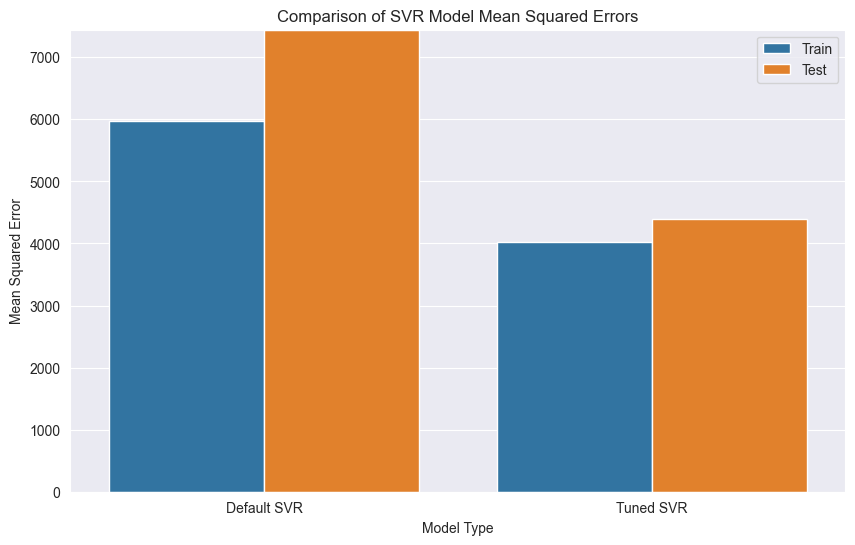

In [44]:


# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Model': models * 2,
    'MSE': train_mses + test_mses,
    'Dataset': ['Train'] * 2 + ['Test'] * 2
})

# Plot the Mean Squared Error results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', hue='Dataset', data=results_df)
plt.ylim(0, max(test_mse_svr, test_mse_svr_tuned) + 10) 
plt.title('Comparison of SVR Model Mean Squared Errors')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model Type')
plt.legend(loc='upper right')
plt.show()


## Gradient Boosting Regression


## Initialising and training GBR

In [45]:
# Initialize the Gradient Boosting Regressor with default settings
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regressor model
gbr_model.fit(X_train, y_train)

# Make predictions with the default Gradient Boosting Regressor
y_train_pred_gbr = gbr_model.predict(X_train)
y_test_pred_gbr = gbr_model.predict(X_test)

# Evaluate the default Gradient Boosting Regressor model
train_mse_gbr = mean_squared_error(y_train, y_train_pred_gbr)
test_mse_gbr = mean_squared_error(y_test, y_test_pred_gbr)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)

# Print results for the default Gradient Boosting Regressor
print(f"\nDefault GBR - Training MSE: {train_mse_gbr:.2f}, R²: {train_r2_gbr:.2f}")
print(f"Default GBR - Test MSE: {test_mse_gbr:.2f}, R²: {test_r2_gbr:.2f}")



Default GBR - Training MSE: 281.69, R²: 0.96
Default GBR - Test MSE: 644.47, R²: 0.93



## Tuning GBR Hyperparameters

In [46]:
# Tuning Gradient Boosting Regressor Hyperparameters: n_estimators and learning_rate
gbr_tuned = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the tuned Gradient Boosting Regressor model
gbr_tuned.fit(X_train, y_train)

# Make predictions with the tuned Gradient Boosting Regressor
y_train_pred_gbr_tuned = gbr_tuned.predict(X_train)
y_test_pred_gbr_tuned = gbr_tuned.predict(X_test)

# Evaluate the tuned Gradient Boosting Regressor model
train_mse_gbr_tuned = mean_squared_error(y_train, y_train_pred_gbr_tuned)
test_mse_gbr_tuned = mean_squared_error(y_test, y_test_pred_gbr_tuned)
train_r2_gbr_tuned = r2_score(y_train, y_train_pred_gbr_tuned)
test_r2_gbr_tuned = r2_score(y_test, y_test_pred_gbr_tuned)

# Print results for the tuned Gradient Boosting Regressor
print(f"\nTuned GBR - Training MSE: {train_mse_gbr_tuned:.2f}, R²: {train_r2_gbr_tuned:.2f}")
print(f"Tuned GBR - Test MSE: {test_mse_gbr_tuned:.2f}, R²: {test_r2_gbr_tuned:.2f}")


Tuned GBR - Training MSE: 133.04, R²: 0.98
Tuned GBR - Test MSE: 527.61, R²: 0.95


## Plotting GBR Results

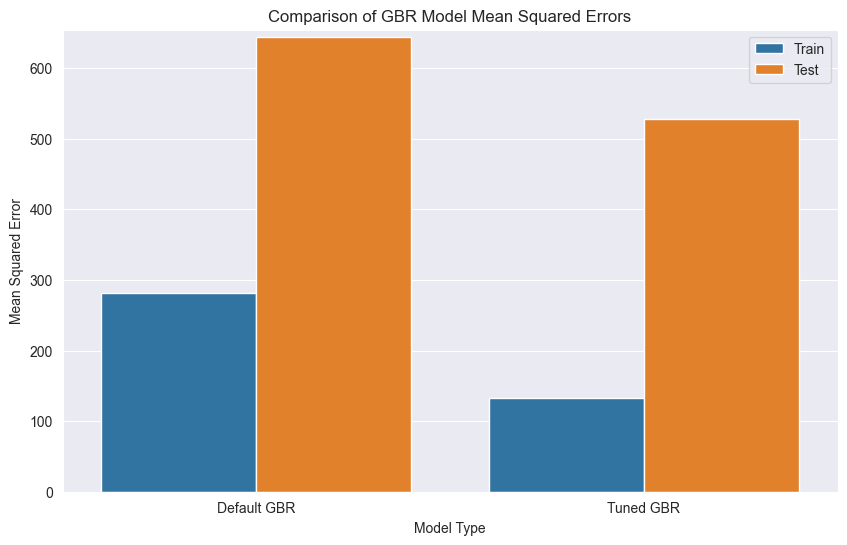

In [47]:

# Create a DataFrame for easier plotting
gbr_models = ['Default GBR', 'Tuned GBR']
gbr_train_mses = [train_mse_gbr, train_mse_gbr_tuned]
gbr_test_mses = [test_mse_gbr, test_mse_gbr_tuned]

# Combine data into a DataFrame for plotting
gbr_results_df = pd.DataFrame({
    'Model': gbr_models * 2,
    'MSE': gbr_train_mses + gbr_test_mses,
    'Dataset': ['Train'] * 2 + ['Test'] * 2
})

# Plot the Mean Squared Error results for GBR
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', hue='Dataset', data=gbr_results_df)
plt.ylim(0, max(test_mse_gbr, test_mse_gbr_tuned) + 10) 
plt.title('Comparison of GBR Model Mean Squared Errors')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model Type')
plt.legend(loc='upper right')
plt.show()


## Results Comparisons

In [48]:
# Compare the performance of the default and tuned models for both SVR and GBR
print("\n====== Summary of Model Results ======\n")

# SVR Results
print(f"Default SVR - Train MSE: {train_mse_svr:.2f}, Test MSE: {test_mse_svr:.2f}")
print(f"Tuned SVR   - Train MSE: {train_mse_svr_tuned:.2f}, Test MSE: {test_mse_svr_tuned:.2f}")

# GBR Results
print(f"Default GBR - Train MSE: {train_mse_gbr:.2f}, Test MSE: {test_mse_gbr:.2f}")
print(f"Tuned GBR   - Train MSE: {train_mse_gbr_tuned:.2f}, Test MSE: {test_mse_gbr_tuned:.2f}")

# Prepare data for plotting
models = ['Default SVR', 'Tuned SVR', 'Default GBR', 'Tuned GBR']
train_mses = [train_mse_svr, train_mse_svr_tuned, train_mse_gbr, train_mse_gbr_tuned]
test_mses = [test_mse_svr, test_mse_svr_tuned, test_mse_gbr, test_mse_gbr_tuned]

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Model': models * 2,
    'MSE': train_mses + test_mses,
    'Dataset': ['Train'] * 4 + ['Test'] * 4
})



====== Summary of Model Results ======

Default SVR - Train MSE: 5968.10, Test MSE: 7433.89
Tuned SVR   - Train MSE: 4030.69, Test MSE: 4400.38
Default GBR - Train MSE: 281.69, Test MSE: 644.47
Tuned GBR   - Train MSE: 133.04, Test MSE: 527.61


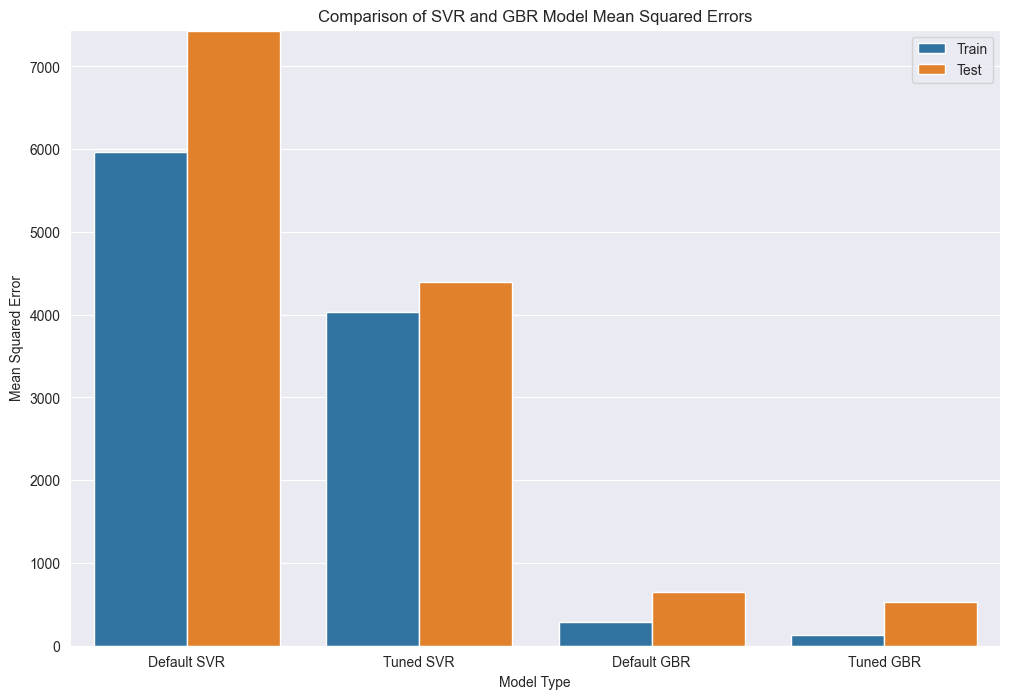

In [49]:
# Plot the Mean Squared Error results
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='MSE', hue='Dataset', data=results_df)
plt.ylim(0, max(test_mse_svr, test_mse_svr_tuned, test_mse_gbr, test_mse_gbr_tuned) + 10)  # Adjust y-axis based on the error range
plt.title('Comparison of SVR and GBR Model Mean Squared Errors')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model Type')
plt.legend(loc='upper right')
plt.show()


===== SVR Hyperparameter Tuning Results =====

        C  epsilon    Train MSE     Test MSE
0     0.1     0.01  7697.749406  9569.787594
1     0.1     0.10  7697.749406  9569.787594
2     0.1     1.00  7690.292325  9559.910232
3     1.0     0.01  5968.095322  7433.893933
4     1.0     0.10  5968.095322  7433.893933
5     1.0     1.00  5974.609864  7439.653079
6    10.0     0.01  4028.494022  4395.076207
7    10.0     0.10  4030.691888  4400.381886
8    10.0     1.00  4040.710554  4421.700415
9   100.0     0.01  3806.592275  3849.203953
10  100.0     0.10  3806.895226  3850.381675
11  100.0     1.00  3799.541260  3840.187605


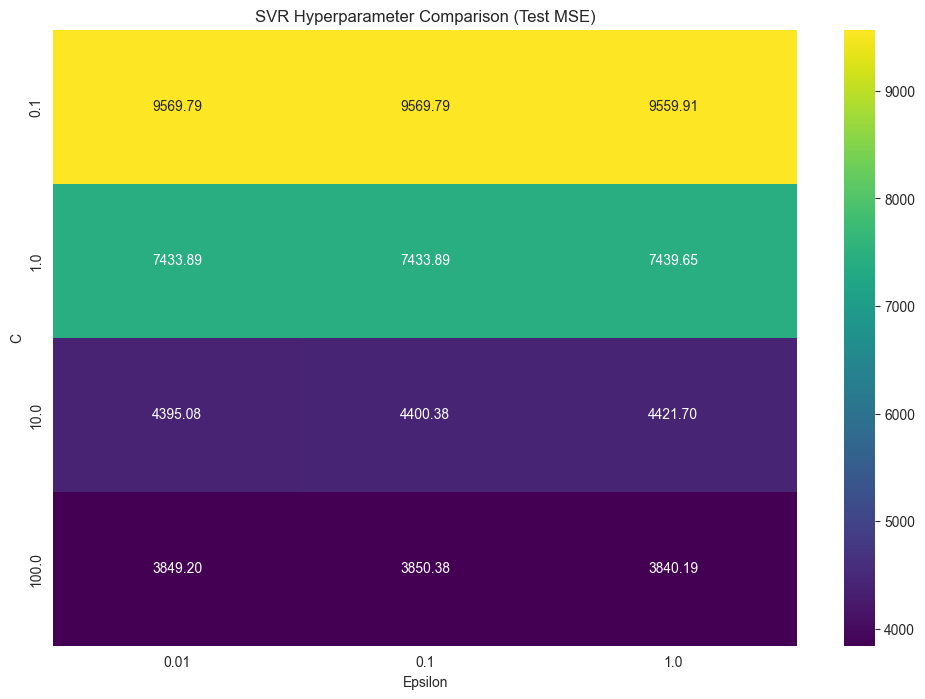


===== GBR Hyperparameter Tuning Results =====

   n_estimators  learning_rate    Train MSE     Test MSE
0            50           0.01  4547.855592  6015.625448
1            50           0.10   526.751045   897.349892
2            50           0.20   281.961356   698.174676
3           100           0.01  2961.918249  4249.406738
4           100           0.10   281.689205   644.472692
5           100           0.20   121.376993   610.946444
6           200           0.01  1509.701971  2339.390341
7           200           0.10   133.043724   527.611140
8           200           0.20    37.623988   557.604994


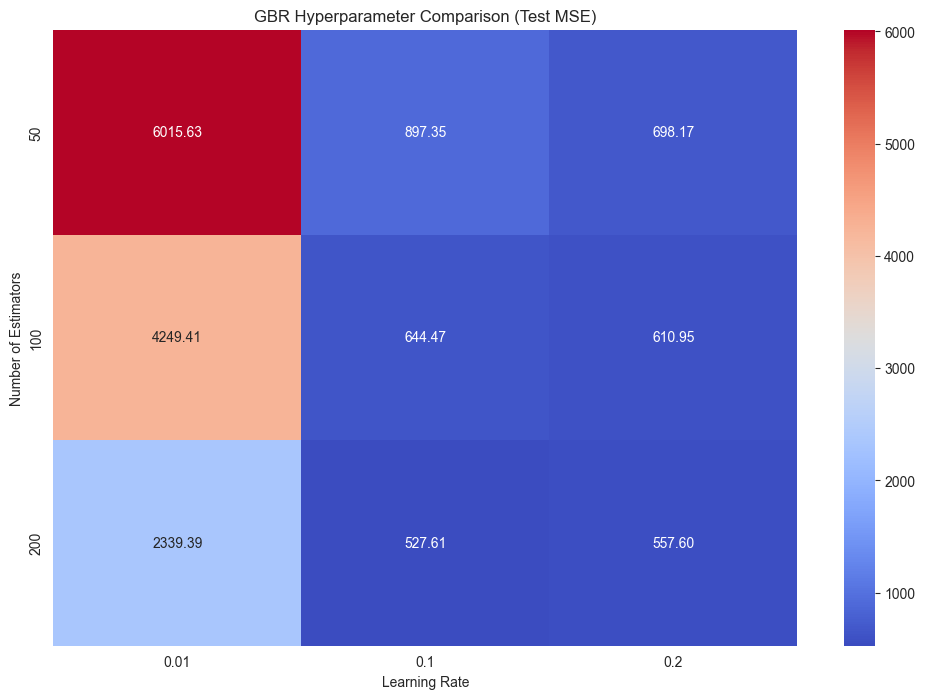


===== Final Hyperparameter Tuning Comparison =====

  Model  Best Test MSE                                Best Parameters
0   SVR    3840.187605                   {'C': 100.0, 'epsilon': 1.0}
1   GBR     527.611140  {'n_estimators': 200.0, 'learning_rate': 0.1}


In [50]:
#Hyperparameter Comparison for SVR

# Define hyperparameter grid for SVR
svr_hyperparameters = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1]
}

# Store results for hyperparameter tuning
svr_results = []

# Loop through hyperparameter combinations
for C in svr_hyperparameters['C']:
    for epsilon in svr_hyperparameters['epsilon']:
        # Train SVR model with given hyperparameters
        svr_temp = SVR(C=C, epsilon=epsilon, kernel='rbf')
        svr_temp.fit(X_train, y_train)

        # Evaluate the model
        train_mse = mean_squared_error(y_train, svr_temp.predict(X_train))
        test_mse = mean_squared_error(y_test, svr_temp.predict(X_test))
        svr_results.append({'C': C, 'epsilon': epsilon, 'Train MSE': train_mse, 'Test MSE': test_mse})

# Convert results to DataFrame
svr_results_df = pd.DataFrame(svr_results)

# Display results as a pivot table
print("\n===== SVR Hyperparameter Tuning Results =====\n")
print(svr_results_df)

# SVR Hyperparameter Visualization
plt.figure(figsize=(12, 8))
svr_pivot = svr_results_df.pivot(index='C', columns='epsilon', values='Test MSE')
sns.heatmap(svr_pivot, annot=True, cmap='viridis', fmt=".2f")
plt.title('SVR Hyperparameter Comparison (Test MSE)')
plt.xlabel('Epsilon')
plt.ylabel('C')
plt.show()

# Hyperparameter Comparison for GBR

# Define hyperparameter grid for GBR
gbr_hyperparameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Store results for hyperparameter tuning
gbr_results = []

# Loop through hyperparameter combinations
for n_estimators in gbr_hyperparameters['n_estimators']:
    for learning_rate in gbr_hyperparameters['learning_rate']:
        # Train GBR model with given hyperparameters
        gbr_temp = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        gbr_temp.fit(X_train, y_train)

        # Evaluate the model
        train_mse = mean_squared_error(y_train, gbr_temp.predict(X_train))
        test_mse = mean_squared_error(y_test, gbr_temp.predict(X_test))
        gbr_results.append({'n_estimators': n_estimators, 'learning_rate': learning_rate, 'Train MSE': train_mse,
                            'Test MSE': test_mse})

# Convert results to DataFrame
gbr_results_df = pd.DataFrame(gbr_results)

# Display results as a pivot table
print("\n===== GBR Hyperparameter Tuning Results =====\n")
print(gbr_results_df)

# Corrected GBR Hyperparameter Visualization
plt.figure(figsize=(12, 8))
gbr_pivot = gbr_results_df.pivot(index='n_estimators', columns='learning_rate', values='Test MSE')
sns.heatmap(gbr_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('GBR Hyperparameter Comparison (Test MSE)')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.show()

## Summary Comparison

# Combine hyperparameter tuning summaries for final comparison
final_results = {
    'Model': ['SVR', 'GBR'],
    'Best Test MSE': [
        svr_results_df['Test MSE'].min(),
        gbr_results_df['Test MSE'].min()
    ],
    'Best Parameters': [
        svr_results_df.loc[svr_results_df['Test MSE'].idxmin(), ['C', 'epsilon']].to_dict(),
        gbr_results_df.loc[gbr_results_df['Test MSE'].idxmin(), ['n_estimators', 'learning_rate']].to_dict()
    ]
}

final_results_df = pd.DataFrame(final_results)

# Display final comparison
print("\n===== Final Hyperparameter Tuning Comparison =====\n")
print(final_results_df)
